## Importing our libraries

In [1]:
from functions import *

In [2]:
import pandas as pd
import numpy as np


### Importing Visualizations 


In [3]:
#For visalizations 

import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

cf.go_offline()

%matplotlib inline

## Uploading the data

In [4]:
crops=load_data('crops.csv')
crops.head()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,OBJECTID
0,Horticulture,Cabbages,Ext Bag,126,KES2205.00,01/01/2012 12:00:00 AM,0
1,Horticulture,Cooking Bananas,Med Bunch,22,KES511.00,01/01/2012 12:00:00 AM,1
2,Horticulture,Ripe Bananas,Med Bunch,14,KES616.00,01/01/2012 12:00:00 AM,2
3,Horticulture,Carrots,Ext Bag,138,KES2833.00,01/01/2012 12:00:00 AM,3
4,Horticulture,Tomatoes,Lg Box,64,KES3411.00,01/01/2012 12:00:00 AM,4


In [5]:
#Upload data set 2 for main food crops per counties 

In [6]:
counties = load_data('counties.csv')
counties.head()

,_id,County,CROP,Area (HA),Production (Tons),Yield ( Tons/HA)
0,1,BARINGO,Beans,15669,11034,0.7
1,2,BOMET,Beans,39002,50140.76,1.3
2,3,BUNGOMA,Beans,77367,61051.12,0.8
3,4,BUSIA,Beans,27351,36422,1.3
4,5,ELGEYO MARAKWET,Beans,14873,16354.62,1.1


In [7]:
# prices dataset
prices = load_data('prices.csv')

prices.head()

,COMMODITY,Unit,Kg,Nairobi,Mombasa,Kisumu,Nakuru,Eldoret,Malindi,Kitale,Kisii,Kitui,Busia,Loitoktok,Garissa,Karatina,Embu,Average,Maximum.
0,Dry Maize,Bag,90.0,2995.000000,3100.000000,3200.000000,2380.000000,2600.0,3240.0,2261.111111,3200.0,3400.0,2373.75,3200.0,3600.0,2800.0,3000.0,2953.561508,3600.0
1,Green Maize,Ext Bag,115.0,3199.583333,5155.416667,1990.000000,1941.666667,1725.0,3000.0,1200.000000,3500.0,2000.0,1500.00,3250.0,6100.0,1000.0,2000.0,2682.976190,6100.0
2,Finger Millet,Bag,90.0,5530.000000,6525.000000,7200.000000,5311.250000,7200.0,5602.5,4500.000000,7300.0,7800.0,4725.00,NaN,7200.0,6000.0,5200.0,6161.057692,7800.0
3,Sorghum,Bag,90.0,3470.000000,3366.666667,3416.666667,3100.000000,3200.0,4357.5,1830.000000,NaN,4500.0,2475.00,NaN,6500.0,3000.0,4800.0,3667.986111,6500.0
4,Wheat,Bag,90.0,NaN,NaN,NaN,3515.000000,2800.0,4500.0,NaN,NaN,NaN,NaN,NaN,5500.0,3500.0,4000.0,3969.166667,5500.0


In [8]:
crops.head(5)

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,OBJECTID
0,Horticulture,Cabbages,Ext Bag,126,KES2205.00,01/01/2012 12:00:00 AM,0
1,Horticulture,Cooking Bananas,Med Bunch,22,KES511.00,01/01/2012 12:00:00 AM,1
2,Horticulture,Ripe Bananas,Med Bunch,14,KES616.00,01/01/2012 12:00:00 AM,2
3,Horticulture,Carrots,Ext Bag,138,KES2833.00,01/01/2012 12:00:00 AM,3
4,Horticulture,Tomatoes,Lg Box,64,KES3411.00,01/01/2012 12:00:00 AM,4


## Getting information on our dataset

In [9]:
check_info(crops)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Produce_Variety  1145 non-null   object
 1   Commodity_Type   1145 non-null   object
 2   Unit             1145 non-null   object
 3   Volume_in_Kgs    1145 non-null   int64 
 4   Values_in_Ksh    1143 non-null   object
 5   Date             1145 non-null   object
 6   OBJECTID         1145 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 62.7+ KB


## Functions

In [10]:
#We will define all our functions here to use
#def means(values):
#  the_mean = sum(values)/len(values)
#  return the_mean

#Function to take in columns with spaces bewteen and retutn striped
#def strip(val):
 # striped = val.str.strip()
 # return striped

#checking for null

#def nuls(val):
#  no_null = val.isnull().sum()
#  return no_null

# Check for duplicates 
#def duplicates(val):
#  no_duplicate=val.duplicated().sum()
#  return no_duplicate

## Data cleaning

### Validity 

In [11]:
counties.head()

,_id,County,CROP,Area (HA),Production (Tons),Yield ( Tons/HA)
0,1,BARINGO,Beans,15669,11034,0.7
1,2,BOMET,Beans,39002,50140.76,1.3
2,3,BUNGOMA,Beans,77367,61051.12,0.8
3,4,BUSIA,Beans,27351,36422,1.3
4,5,ELGEYO MARAKWET,Beans,14873,16354.62,1.1


In [12]:
# Ronald
#Drop illerevant columns, remove spaces at the beginign and end of  the columns

#Strip spaces within
strip((crops.Produce_Variety))
strip((crops.Commodity_Type))
#strip counties dataset
strip((counties.County))
strip((counties.CROP))
#Replace KES with empty 

crops['Values_in_Ksh'] = crops['Values_in_Ksh'].str.replace("KES","")

#Dataset 2 
counties['County']= counties['County'].str.strip()


### Accuracy 

In [13]:
#checking if related columns match

### Completeness 

#### checking for null values

In [14]:
# check for null values and either drop or fill
#fill null values in prices since we assume that all null means its not sold there 
prices.fillna(0, inplace=True)

In [15]:
prices.head()

,COMMODITY,Unit,Kg,Nairobi,Mombasa,Kisumu,Nakuru,Eldoret,Malindi,Kitale,Kisii,Kitui,Busia,Loitoktok,Garissa,Karatina,Embu,Average,Maximum.
0,Dry Maize,Bag,90.0,2995.000000,3100.000000,3200.000000,2380.000000,2600.0,3240.0,2261.111111,3200.0,3400.0,2373.75,3200.0,3600.0,2800.0,3000.0,2953.561508,3600.0
1,Green Maize,Ext Bag,115.0,3199.583333,5155.416667,1990.000000,1941.666667,1725.0,3000.0,1200.000000,3500.0,2000.0,1500.00,3250.0,6100.0,1000.0,2000.0,2682.976190,6100.0
2,Finger Millet,Bag,90.0,5530.000000,6525.000000,7200.000000,5311.250000,7200.0,5602.5,4500.000000,7300.0,7800.0,4725.00,0.0,7200.0,6000.0,5200.0,6161.057692,7800.0
3,Sorghum,Bag,90.0,3470.000000,3366.666667,3416.666667,3100.000000,3200.0,4357.5,1830.000000,0.0,4500.0,2475.00,0.0,6500.0,3000.0,4800.0,3667.986111,6500.0
4,Wheat,Bag,90.0,0.000000,0.000000,0.000000,3515.000000,2800.0,4500.0,0.000000,0.0,0.0,0.00,0.0,5500.0,3500.0,4000.0,3969.166667,5500.0


In [16]:
#checking nulls on crops dataset
#crops.isnull().sum()
nuls(crops)

Produce_Variety    0
Commodity_Type     0
Unit               0
Volume_in_Kgs      0
Values_in_Ksh      2
Date               0
OBJECTID           0
dtype: int64

In [17]:
#Fill Na values with group mean using lambda

crops = crops.groupby(['Commodity_Type']).apply(lambda group: group.ffill())
#crops['Values_in_Ksh'].fillna(value= crops.groupby()means(crops['Commodity_Type']),inplace=True)

In [18]:
#check nul again 
nuls(crops)

Produce_Variety    0
Commodity_Type     0
Unit               0
Volume_in_Kgs      0
Values_in_Ksh      0
Date               0
OBJECTID           0
dtype: int64

In [19]:
#chuck nuls in prices 
nuls(prices)

COMMODITY    0
Unit         0
Kg           0
Nairobi      0
Mombasa      0
Kisumu       0
Nakuru       0
Eldoret      0
Malindi      0
Kitale       0
Kisii        0
Kitui        0
Busia        0
Loitoktok    0
Garissa      0
Karatina     0
Embu         0
Average      0
Maximum.     0
dtype: int64

In [20]:
#checking nulls on counties dataset
check_info(prices)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COMMODITY  42 non-null     object 
 1   Unit       42 non-null     object 
 2   Kg         42 non-null     float64
 3   Nairobi    42 non-null     float64
 4   Mombasa    42 non-null     float64
 5   Kisumu     42 non-null     float64
 6   Nakuru     42 non-null     float64
 7   Eldoret    42 non-null     float64
 8   Malindi    42 non-null     float64
 9   Kitale     42 non-null     float64
 10  Kisii      42 non-null     float64
 11  Kitui      42 non-null     float64
 12  Busia      42 non-null     float64
 13  Loitoktok  42 non-null     float64
 14  Garissa    42 non-null     float64
 15  Karatina   42 non-null     float64
 16  Embu       42 non-null     float64
 17  Average    42 non-null     float64
 18  Maximum.   42 non-null     float64
dtypes: float64(17), object(2)
memory usage: 6.4+ KB


###Consistency 

In [21]:
#dealing with duplicates 
#checking for duplicates in crops
duplicates(crops)


#No duplicates in the two datasets 


0

In [22]:
duplicates(prices)

0

In [23]:
#checking for duplicates in counties
duplicates(counties)

0

### Uniformity 

#### Columns

In [24]:
# Standaridization to fix messy columns to rename 
# example; officials_data.columns = officials_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')','') 
# data type conversions like to pd.to_datetime 
counties.columns = counties.columns.str.strip().str.replace('(','').str.replace(')',"").str.replace(')',"").str.replace('/',"_per_").str.replace(' ',"_") 

In [25]:
#Drop columns 
crops.drop(['OBJECTID'], axis = 1, inplace=True)

#### Data type conversion

In [26]:
# 

In [27]:
#removing KES from Values in Ksh column
crops["Values_in_Ksh"]=crops["Values_in_Ksh"].str.replace("KES","")

In [28]:
crops.head(5)

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date
0,Horticulture,Cabbages,Ext Bag,126,2205.00,01/01/2012 12:00:00 AM
1,Horticulture,Cooking Bananas,Med Bunch,22,511.00,01/01/2012 12:00:00 AM
2,Horticulture,Ripe Bananas,Med Bunch,14,616.00,01/01/2012 12:00:00 AM
3,Horticulture,Carrots,Ext Bag,138,2833.00,01/01/2012 12:00:00 AM
4,Horticulture,Tomatoes,Lg Box,64,3411.00,01/01/2012 12:00:00 AM


In [29]:
#convert crops value in ksh to integer
crops["Values_in_Ksh"]=crops["Values_in_Ksh"].astype(float)

In [30]:
#Convert Ha in counties to integer value

counties['Area__HA'] = counties['Area__HA'].str.replace(',','').str.replace(" -   ","")
counties['Area__HA']=pd.to_numeric(counties.Area__HA)


In [31]:
crops.head(5)

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date
0,Horticulture,Cabbages,Ext Bag,126,2205.0,01/01/2012 12:00:00 AM
1,Horticulture,Cooking Bananas,Med Bunch,22,511.0,01/01/2012 12:00:00 AM
2,Horticulture,Ripe Bananas,Med Bunch,14,616.0,01/01/2012 12:00:00 AM
3,Horticulture,Carrots,Ext Bag,138,2833.0,01/01/2012 12:00:00 AM
4,Horticulture,Tomatoes,Lg Box,64,3411.0,01/01/2012 12:00:00 AM


In [32]:
#changing date
crops['Date'] =  pd.to_datetime(crops['Date'])

In [33]:
check_info(crops)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Produce_Variety  1145 non-null   object        
 1   Commodity_Type   1145 non-null   object        
 2   Unit             1145 non-null   object        
 3   Volume_in_Kgs    1145 non-null   int64         
 4   Values_in_Ksh    1145 non-null   float64       
 5   Date             1145 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 53.8+ KB


In [34]:
crops.head()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date
0,Horticulture,Cabbages,Ext Bag,126,2205.0,2012-01-01
1,Horticulture,Cooking Bananas,Med Bunch,22,511.0,2012-01-01
2,Horticulture,Ripe Bananas,Med Bunch,14,616.0,2012-01-01
3,Horticulture,Carrots,Ext Bag,138,2833.0,2012-01-01
4,Horticulture,Tomatoes,Lg Box,64,3411.0,2012-01-01


In [35]:
counties

,_id,County,CROP,Area__HA,Production__Tons,Yield__Tons_per_HA
0,1,BARINGO,Beans,15669.0,11034,0.7
1,2,BOMET,Beans,39002.0,50140.76,1.3
2,3,BUNGOMA,Beans,77367.0,61051.12,0.8
3,4,BUSIA,Beans,27351.0,36422,1.3
4,5,ELGEYO MARAKWET,Beans,14873.0,16354.62,1.1
...,...,...,...,...,...,...
154,155,TAITA TAVETA,Rice,380.0,1320,3.5
155,156,TANA RIVER,Rice,1210.0,3855,3.2
156,157,THARAKA NITHI,Rice,28.0,79,2.8
157,158,WEST POKOT,Rice,20.0,72,3.6


In [36]:
counties.info

<bound method DataFrame.info of      _id           County   CROP  Area__HA Production__Tons  \
0      1          BARINGO  Beans   15669.0            11034   
1      2            BOMET  Beans   39002.0         50140.76   
2      3          BUNGOMA  Beans   77367.0         61051.12   
3      4            BUSIA  Beans   27351.0            36422   
4      5  ELGEYO MARAKWET  Beans   14873.0         16354.62   
..   ...              ...    ...       ...              ...   
154  155     TAITA TAVETA   Rice     380.0             1320   
155  156       TANA RIVER   Rice    1210.0             3855   
156  157    THARAKA NITHI   Rice      28.0               79   
157  158       WEST POKOT   Rice      20.0               72   
158  159           VIHIGA   Rice       4.0               18   

     Yield__Tons_per_HA  
0                   0.7  
1                   1.3  
2                   0.8  
3                   1.3  
4                   1.1  
..                  ...  
154                 3.5  
155

#**Analysis Questions**

## 1. What are the average market prices of various products?

In [37]:
counties['CROP'].nunique


<bound method IndexOpsMixin.nunique of 0      Beans
1      Beans
2      Beans
3      Beans
4      Beans
       ...  
154     Rice
155     Rice
156     Rice
157     Rice
158     Rice
Name: CROP, Length: 159, dtype: object>

In [38]:
uniquecrops = counties.groupby('CROP')
counties

,_id,County,CROP,Area__HA,Production__Tons,Yield__Tons_per_HA
0,1,BARINGO,Beans,15669.0,11034,0.7
1,2,BOMET,Beans,39002.0,50140.76,1.3
2,3,BUNGOMA,Beans,77367.0,61051.12,0.8
3,4,BUSIA,Beans,27351.0,36422,1.3
4,5,ELGEYO MARAKWET,Beans,14873.0,16354.62,1.1
...,...,...,...,...,...,...
154,155,TAITA TAVETA,Rice,380.0,1320,3.5
155,156,TANA RIVER,Rice,1210.0,3855,3.2
156,157,THARAKA NITHI,Rice,28.0,79,2.8
157,158,WEST POKOT,Rice,20.0,72,3.6


In [39]:
# Grouping each crop by value counts to give the total of each commodity

counties['CROP'].value_counts()

Beans             47
Sorghum           47
Irish Potatoes    30
Rice              21
Wheat             14
Name: CROP, dtype: int64

In [40]:
# Out

counties['CROP'] == "Beans"

0       True
1       True
2       True
3       True
4       True
       ...  
154    False
155    False
156    False
157    False
158    False
Name: CROP, Length: 159, dtype: bool

C:\Users\ronal\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning:

The handle <BarContainer object of 5 artists> has a label of '_id' which cannot be automatically added to the legend.



<AxesSubplot:xlabel='CROP'>

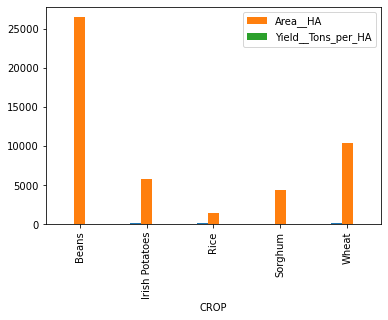

In [41]:
counties.groupby('CROP').mean().plot(kind='bar')

In [42]:
# This output is the average value in Ksh per Commodity Type
crops.groupby('Commodity_Type').mean()['Values_in_Ksh']

Commodity_Type
Avocado                  2158.064516
Beans Canadian           6133.791667
Beans Mwitemania         5628.666667
Beans Rosecoco           6134.708333
Brinjals                 1637.935484
Cabbages                 2121.967742
Capsicums                2612.838710
Carrots                  3565.000000
Cassava Fresh            1973.041667
Cauliflower              2528.451613
Chillies                 2679.838710
Cooking Bananas           553.806452
Cowpeas                  6094.166667
Cucumber                 2072.870968
Dolichos (Njahi)         8741.291667
Dry Maize                2782.875000
Finger Millet            6416.041667
Fresh Peas               2928.083333
Green Gram               8951.625000
Green Maize              2907.000000
Groundnuts              11952.541667
Kales                    1227.774194
Lemons                   1978.322581
Lettuce                  3342.419355
Limes                     723.838710
Mangoes Local            2083.774194
Mangoes Ngowe          

In [43]:
# This output is the average value in Ksh per Produce Variety

crops.groupby('Produce_Variety').mean()['Values_in_Ksh']

Produce_Variety
Cereals           3934.266667
Horticulture      2027.349229
Legumes           6920.851852
Roots & Tubers    2662.968750
Name: Values_in_Ksh, dtype: float64

## 2. What are the best regions to plant various commodities?

In [44]:
counties.head()

,_id,County,CROP,Area__HA,Production__Tons,Yield__Tons_per_HA
0,1,BARINGO,Beans,15669.0,11034,0.7
1,2,BOMET,Beans,39002.0,50140.76,1.3
2,3,BUNGOMA,Beans,77367.0,61051.12,0.8
3,4,BUSIA,Beans,27351.0,36422,1.3
4,5,ELGEYO MARAKWET,Beans,14873.0,16354.62,1.1


In [45]:
#Get a dataframe for max values
#we will only select ones with over 10,000 Hactares of land under that specific commodity
df_counties = counties[counties['Area__HA']>100]

maxmum = counties.groupby(['CROP'])['Yield__Tons_per_HA'].transform(max) == counties['Yield__Tons_per_HA']

In [46]:
df_counties[maxmum]

<ipython-input-46-8c8ef6548f3e>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,_id,County,CROP,Area__HA,Production__Tons,Yield__Tons_per_HA
1,2,BOMET,Beans,39002.0,50140.76,1.3
3,4,BUSIA,Beans,27351.0,36422,1.3
54,55,HOMA BAY,Sorghum,18925.0,"37,440",2.0
98,99,EMBU,Irish Potatoes,332.0,6980,21.0
129,130,MERU,Wheat,10180.0,49475,4.9


## 3. Which is the best duration to sell a specific commodity?

In [47]:
#Add months column to group by
crops['Month'] = crops['Date'].dt.month
crops.head()


,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,Month
0,Horticulture,Cabbages,Ext Bag,126,2205.0,2012-01-01,1
1,Horticulture,Cooking Bananas,Med Bunch,22,511.0,2012-01-01,1
2,Horticulture,Ripe Bananas,Med Bunch,14,616.0,2012-01-01,1
3,Horticulture,Carrots,Ext Bag,138,2833.0,2012-01-01,1
4,Horticulture,Tomatoes,Lg Box,64,3411.0,2012-01-01,1


In [48]:
a=crops.groupby(['Commodity_Type'])['Values_in_Ksh'].transform(max) == crops['Values_in_Ksh']
b=crops[a].groupby(['Month','Commodity_Type']).max()
b.drop(columns=['Produce_Variety','Date'])

Unit  Volume_in_Kgs  Values_in_Ksh
Month Commodity_Type                                               
1     Oranges                     Bag             93         3795.0
2     Brinjals                    Bag             44         2126.0
      Cooking Bananas       Med Bunch             22          629.0
      Pawpaw                   Lg Box             54         2005.0
      Ripe Bananas          Med Bunch             14          708.0
      Sorghum                     Bag             90         4202.0
3     Cabbages                Ext Bag            126         3049.0
      Capsicums                   Bag             50         3247.0
      Cucumber                    Bag             50         2742.0
      Kales                       Bag             50         2359.0
4     Cauliflower               crate             39         3781.0
      Lemons                      Bag             95         2611.0
5     Avocado                     Bag             90         2705.0
      Beans Mwitemania            Bag             90         6903.0
      Beans Rosecoco              Bag             90         7522.0
      Cassava Fresh               Bag             99         2350.0
      Cowpeas                     Bag             90         7509.0
      Finger Millet               Bag             90         7216.0
      Fresh Peas                  Bag             51         4343.0
      Green Gram                  Bag             90        11905.0
      Green Maize             Ext Bag            115         3872.0
      Limes                       net             13         1135.0
      Red Irish Potatoes          Bag            110         3812.0
      Spring Onions               Bag            142         2571.0
      Tomatoes                 Lg Box             64         5664.0
      White Irish Potatoes        Bag            110         3935.0
6     Beans Canadian              Bag             90         7471.0
      Carrots                 Ext Bag            138         5715.0
      Mwezi Moja                  Bag             90         7279.0
      Onions Dry                  net             13         1259.0
      Passion Fruits              Bag             57         4675.0
      Sweet Potatoes              Bag             98         3259.0
      Wheat                       Bag             90         4540.0
7     Groundnuts                  Bag            110        13713.0
9     Chillies                    Bag             38         3783.0
      Lettuce                     Bag             51         4983.0
      Mangoes Local               Bag            126         2688.0
      Mangoes Ngowe         Sm Basket             25         1262.0
      Pineapples                Dozen             13          935.0
12    Dolichos (Njahi)            Bag             90        12622.0
      Dry Maize                   Bag             90         3037.0

<AxesSubplot:xlabel='Month'>

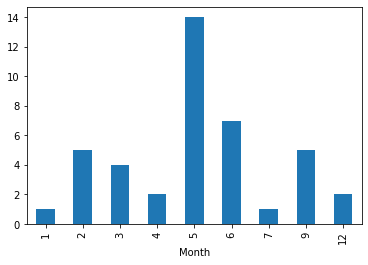

In [49]:
#b.drop(columns=['Produce_Variety','Date']).plot(kind = 'bar')
#b.plot(kind = 'bar', x='Month', y='Commodity_Type')  
#plot data
#fig, ax = plt.subplots(figsize=(15,7))
#data.groupby(['date','type']).count()['amount'].plot(ax=ax)
crops[a].groupby(['Month']).count()['Commodity_Type'].plot(kind = 'bar')

#Shows the number of products sold in a particular month
#This shows that the month of May is peak in selling various commodites 

## 4. What is the best selling commodity in various counties?

In [50]:

crops['value_per_kg']= (crops['Values_in_Ksh']/crops['Volume_in_Kgs']).round(2)
crops.head()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,Month,value_per_kg
0,Horticulture,Cabbages,Ext Bag,126,2205.0,2012-01-01,1,17.50
1,Horticulture,Cooking Bananas,Med Bunch,22,511.0,2012-01-01,1,23.23
2,Horticulture,Ripe Bananas,Med Bunch,14,616.0,2012-01-01,1,44.00
3,Horticulture,Carrots,Ext Bag,138,2833.0,2012-01-01,1,20.53
4,Horticulture,Tomatoes,Lg Box,64,3411.0,2012-01-01,1,53.30


In [51]:
counties.head()

,_id,County,CROP,Area__HA,Production__Tons,Yield__Tons_per_HA
0,1,BARINGO,Beans,15669.0,11034,0.7
1,2,BOMET,Beans,39002.0,50140.76,1.3
2,3,BUNGOMA,Beans,77367.0,61051.12,0.8
3,4,BUSIA,Beans,27351.0,36422,1.3
4,5,ELGEYO MARAKWET,Beans,14873.0,16354.62,1.1


In [52]:
counties[maxmum]

,_id,County,CROP,Area__HA,Production__Tons,Yield__Tons_per_HA
1,2,BOMET,Beans,39002.0,50140.76,1.3
3,4,BUSIA,Beans,27351.0,36422,1.3
54,55,HOMA BAY,Sorghum,18925.0,"37,440",2.0
56,57,KAJIADO,Sorghum,46.0,93,2.0
98,99,EMBU,Irish Potatoes,332.0,6980,21.0
129,130,MERU,Wheat,10180.0,49475,4.9
158,159,VIHIGA,Rice,4.0,18,4.5


In [53]:
#Best selling commidity in various counties 
prices.head(20)

,COMMODITY,Unit,Kg,Nairobi,Mombasa,Kisumu,Nakuru,Eldoret,Malindi,Kitale,Kisii,Kitui,Busia,Loitoktok,Garissa,Karatina,Embu,Average,Maximum.
0,Dry Maize,Bag,90.0,2995.000000,3100.000000,3200.000000,2380.000000,2600.000000,3240.0000,2261.111111,3200.000000,3400.0,2373.750000,3200.0,3600.0,2800.0,3000.0,2953.561508,3600.0000
1,Green Maize,Ext Bag,115.0,3199.583333,5155.416667,1990.000000,1941.666667,1725.000000,3000.0000,1200.000000,3500.000000,2000.0,1500.000000,3250.0,6100.0,1000.0,2000.0,2682.976190,6100.0000
2,Finger Millet,Bag,90.0,5530.000000,6525.000000,7200.000000,5311.250000,7200.000000,5602.5000,4500.000000,7300.000000,7800.0,4725.000000,0.0,7200.0,6000.0,5200.0,6161.057692,7800.0000
3,Sorghum,Bag,90.0,3470.000000,3366.666667,3416.666667,3100.000000,3200.000000,4357.5000,1830.000000,0.000000,4500.0,2475.000000,0.0,6500.0,3000.0,4800.0,3667.986111,6500.0000
4,Wheat,Bag,90.0,0.000000,0.000000,0.000000,3515.000000,2800.000000,4500.0000,0.000000,0.000000,0.0,0.000000,0.0,5500.0,3500.0,4000.0,3969.166667,5500.0000
5,Beans Canadian,Bag,90.0,5315.000000,0.000000,6200.000000,0.000000,0.000000,6300.0000,3733.333333,0.000000,0.0,4500.000000,0.0,5400.0,6500.0,5000.0,5368.541667,6500.0000
6,Beans Rosecoco,Bag,90.0,5200.000000,4995.000000,6000.000000,4800.000000,5850.000000,6015.0000,3733.333333,4900.000000,5600.0,4556.250000,0.0,5400.0,5500.0,5500.0,5234.583333,6015.0000
7,Beans Mwitemania,Bag,90.0,5070.000000,5868.750000,0.000000,4050.000000,4557.000000,6015.0000,3733.333333,0.000000,6000.0,0.000000,5750.0,5500.0,4560.0,4000.0,5009.462121,6015.0000
8,Mwezi Moja,Bag,90.0,5030.000000,0.000000,0.000000,4333.333333,0.000000,6150.0000,0.000000,0.000000,6200.0,0.000000,6000.0,5400.0,0.0,0.0,5518.888889,6200.0000
9,Beans Dolichos (Njahi),Bag,90.0,6495.000000,7166.250000,0.000000,7965.000000,7200.000000,9000.0000,8400.000000,0.000000,6800.0,0.000000,7200.0,9000.0,8000.0,8500.0,7793.295455,9000.0000


In [54]:
#Most popular popular product across the country
prices.drop(columns = ['COMMODITY','Unit','Kg']).idxmax()

# This shows that column that contains most expensive commodity across many counties and thats Groundnuts

Nairobi      13
Mombasa      13
Kisumu       13
Nakuru       13
Eldoret      13
Malindi      13
Kitale       13
Kisii        13
Kitui        13
Busia        13
Loitoktok    10
Garissa      13
Karatina     13
Embu         13
Average      13
Maximum.     13
dtype: int64

In [55]:
#Product 13 is the best selling commodity in various counties since it fetches a lot of money in almost all the counties
#product 13 is the ground nuts

<AxesSubplot:>

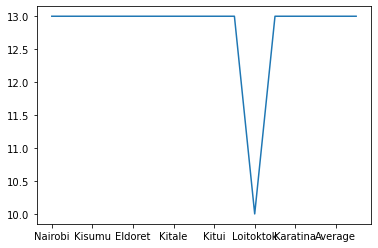

In [56]:
prices.drop(columns = ['COMMODITY','Unit','Kg']).idxmax().plot()
#Loitokitok is for green grams 
